In [26]:
# library imports
from importlib import reload
from copy import deepcopy
from Classes import ClusterObj, BlockObj, ScanDataObj
from Functions import CommonFunctions, ClassesFunctions
import pickle
import pandas as pd
import re
reload(CommonFunctions)
reload(ClassesFunctions)
reload(ClusterObj)
reload(BlockObj)
reload(ScanDataObj)

print('Done!')


Done!


In [27]:
# path setup
# path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Home Folder aa714/Private/BME LAB/Afi/OOD Detection/Data/Ag Test"

path = "/Users/afarinaqs/Library/CloudStorage/Box-Box/Genepix/20250522"
input_file_name = 'P0520_Beta35_Beta36_S8_N5'
image, scaled_image = CommonFunctions.load_image(file_name=input_file_name, path=path, debug=False, plot_images=False, rotation=0)
# print(f'Loaded Image "{input_file_name}" {image.shape}')


In [28]:
# load the saved work, or start over:
scan_data = ClassesFunctions.read_scan_data_from_pickle(
    file_name=input_file_name,
    path=path,
    start_over=0, # if True -> ignores the pickle, and returns None for initiating with the following functions
    plot_results=False,
    debug=False
)

# scan_data = []
if not scan_data:
    start_over = True
else:
    print(f'Successfully loaded scan_data for "{input_file_name}"')
    start_over = False



Successfully loaded scan_data for "P0520_Beta35_Beta36_S8_N5"


In [29]:
# todo: add a function for parameter tuning...
# start_over = True
start_over

False

In [30]:
## Setting the parameters:
# start_over = True
do_test = 1
input_param_dict = {
    'scan_size': 5, 'assay': 'OF', 'cAb_names': [],
    'blur_kernel_size': 9, 'contrast_thr': 500, 'canny_edge_thr1': 180, 'canny_edge_thr2':290, # preprocessing
    'dp': 0.6, 'param1': 10, 'param2':5, 'minRadius': 12, 'maxRadius': 20, # circle finding
    'eps':500, 'x_power': 3, 'y_power': 5, 'min_samples': 3 # clustering
}

# reset = True/False to overwrite start_over
if start_over:
    ScanDataObj.init_or_reset_params(file_name=input_file_name, input_param_dict=input_param_dict, debug=False)
    if do_test:
        if input_param_dict['assay'] == 'SD4':
            test_image = deepcopy(image)[1000:1700,500:2500] #(y,x) -> change if u want!
        else:
            test_image = deepcopy(image)[300:1400,50:2600]
        # checkme takes too long
        # CommonFunctions.optimize_the_params(file_name=input_file_name, input_image=test_image, how_many_times=1, plot_images=False, debug=False)
        CommonFunctions.test_current_parameters(input_image=test_image, file_name=input_file_name, fig_size=[12,7], debug=False)

In [31]:
scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)

In [32]:
# start_over=True
if start_over or not scan_data.sorted_circles:
    CommonFunctions.do_initial_circle_finding(file_name=input_file_name, debug=False, plot_images=False)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
# else:
#     sorted_circles, predicted_clusters_ids = [],[]

In [33]:
# start_over = True
test_block_sizes = 1

if start_over:
    ClassesFunctions.init_blocks_dict(
        file_name=input_file_name, debug=False, plot_blocks=False,
        # debug_block_ids=['r0c0','r0c1','r0c2','r0c3'],
        init_offset=[-200,-230],
        block_size_adjustment=550,
        block_distance_adjustment=[0,-30],
    )
    if test_block_sizes:
        ClassesFunctions.plot_blocks_on_image(file_name=input_file_name, debug=False)
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [34]:
# ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [35]:
# start_over = True
if start_over:
    ClassesFunctions.init_clusters_dict(scan_data.sorted_circles, scan_data.predicted_clusters_ids, input_file_name,
                                        optimize_spots_coords=1, debug=0, debug_clusters_ids=[])
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [36]:
# connect clusters and blocks (and final initiation stuff)
if start_over:
    ClassesFunctions.connect_clusters_to_blocks(file_name=input_file_name,debug=False,debug_clusters=[],debug_blocks=[],plot_images=False,)
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

In [37]:
# ScanDataObj.get_block_image('r0c0')

In [38]:
# scan_data.get_cluster(0).__dict__

In [40]:
start_over

False

[0, 1, 6, 7, 12, 15, 16, 17, 24, 25, 26, 33, 34, 39, 40, 41, 48, 49, 54, 55, 56, 63, 64]

 

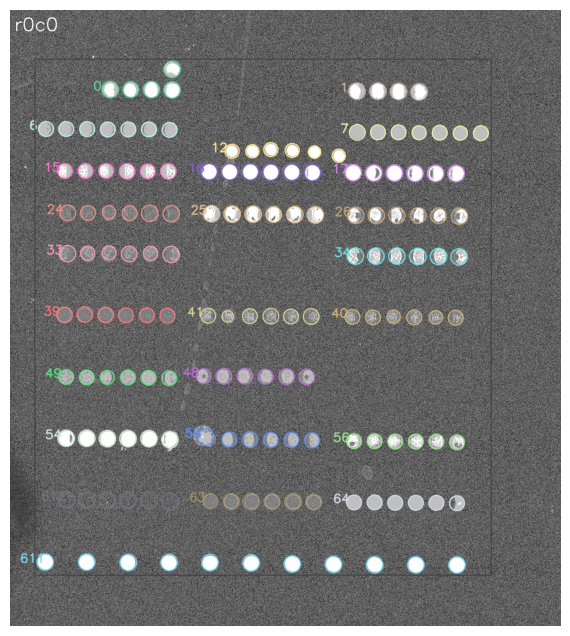

There are 25 clusters in total.


In [46]:
## Making the first template of cluster patterns
start_over=True

test_ind = f'r0c0'
test_block: BlockObj.Block = scan_data.get_block(test_ind)
if not start_over:
    test_block.plot_block(fig_size=[6, 6], debug=False, with_border=True, crop_to_mask=True)
else:
    scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)
    manual_spot_edit_dict = {
        0:['add 1 to r','move spot-1 50 u, 50 l'],
        64:['add 1 cluster below d=150'],
        611:['change_r all r+2','move spot0 750 l, 5 u','move spot1 699 l, 5 u','move spot2 648 l, 5 u','move spot3 599 l,5 u','move spot4 550 l, 5 u',
             'move spot5 500 l, 5 u','add 5 to r','move spot-1 5 d','move spot-2 5 d','move spot-3 5 d','move spot-4 4 d','move spot-5 3 d',],
        12:['move spot0 1 r','move spot2 1 r'],
        54:['add 1 cluster below d=150']

    }
    print(test_block.clusters_ids_list)
    test_block.edit_block(debug=0, plot_before_after=False, overwrite=True,with_restore=True,
                          manual_spot_edit_dict=manual_spot_edit_dict)
    test_mask = test_block.create_block_mask(debug=False, plot_images=False)
    test_block.plot_block(fig_size=[8,8], debug=False, with_border=True, crop_to_mask=False)

N = len(test_block.clusters_ids_list)
print(f'There are {N} clusters in total.')


In [41]:
# generating the list to edit each row at the same time
generate_list = lambda n: [f'r{n}c{i}' for i in range(scan_data.block_ncol)]
rows_names_list = []
for r in range(scan_data.block_nrow):
    rows_names_list.append(generate_list(r))


fig_size = [20,10] if scan_data.assay == 'SD4' else [15,15]
print(f'start_over is {start_over}')


start_over is False


In [42]:
# ScanDataObj.get_block_image(
#             file_name=test_block.file_name,
#             block_id=test_block.block_id,
#             image_tag='block_mask'
#         )
plot_figures = False
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)

['r0c0', 'r0c1', 'r0c2']

 

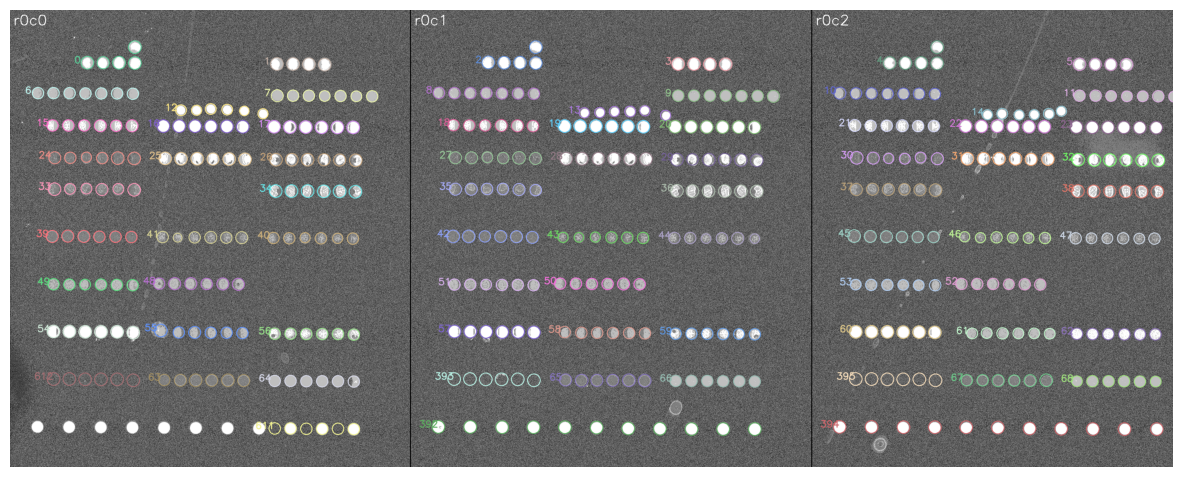

In [44]:
# row 0
r = 0
current_list = rows_names_list[r]
print(current_list)

# start_over = True
fig_size = [60,30] if scan_data.assay == 'SD4' else [15,15]

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=1)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={'r0c0':[0,0],'r0c1':[0,0],'r0c2':[100,0],'r0c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            13:['move all 2 d, 1 r','move spot-1 3 d, 4 r','move spot-3 1 r'],
            14:['del spot8,6,4,2,0','change_r spot-2 r-3','move spot-2 3 r, 2 u','move spot-1 2 u, 3 l','move spot1 2 u, 2 r'],
            61:['del spot0','move all 5 r','move spot0 3 l'],53:['move spot-1 2 r'],
            394:['move spot-1 2 r'],393:['move all 1 l']
        })

['r1c0', 'r1c1', 'r1c2']

 

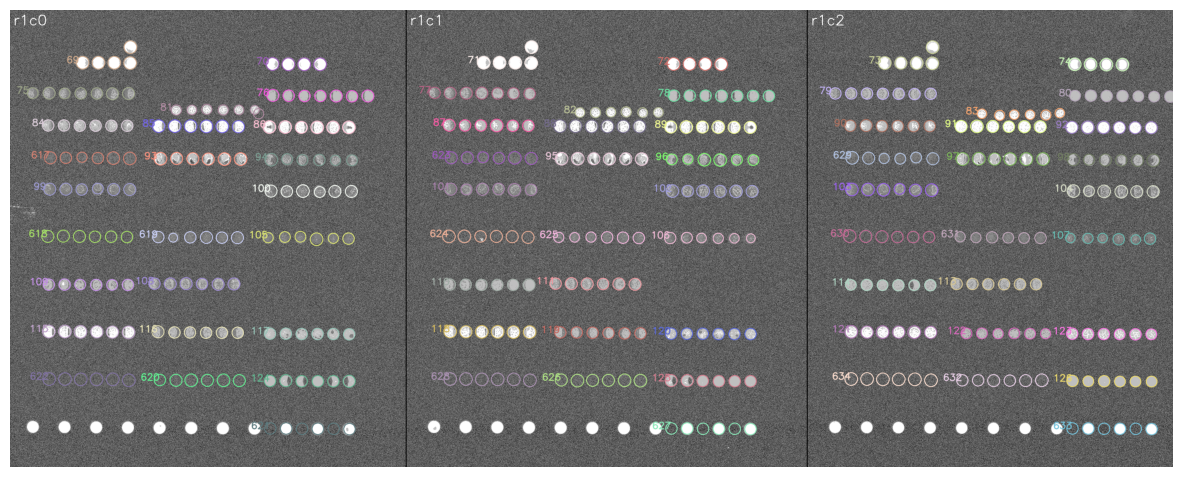

In [18]:
## row 1
r = 1
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[0,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            83:['move spot-1 2 r, 1 d','change_r spot-2 r-2','move spot-2 3 d','move spot1 1 d, 2 r'],
            82:['move spot-1 2 u, 2 l'],
            105:['move spot-3 3 d','change_r spot-3 r+2']
        })

['r2c0', 'r2c1', 'r2c2']

 

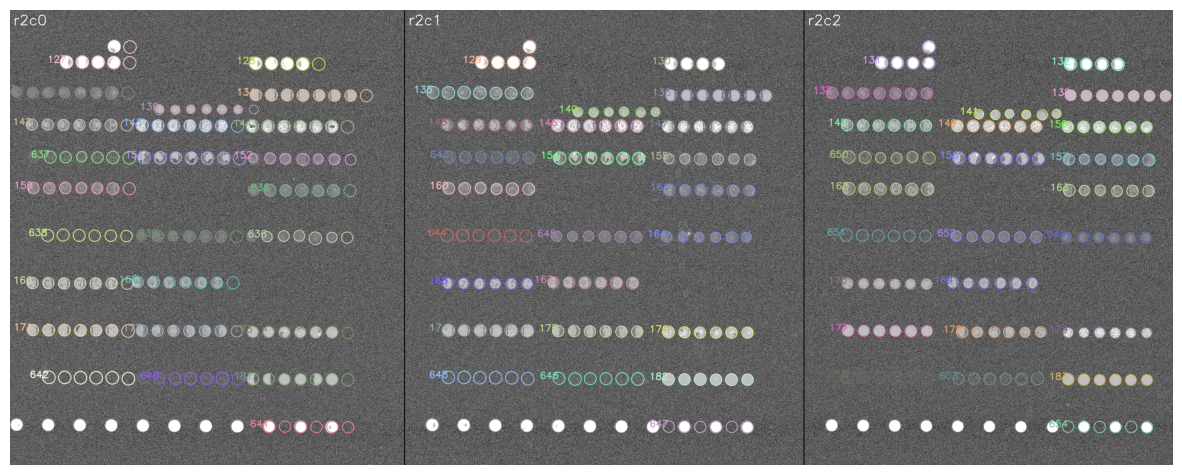

In [19]:
# row 2
r = 2
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[0,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            164:['del spot0','move spot-1 3 l','move spot-2 3 l'],
            139:['del spot-1'],421:['move all 3 r, 2 u'],433:['move spot-1 3 l'],141:['change_r spot-2 r-1'],
            415:['move all 3 d','change_r all r+1','change_r spot-3 r-3','move spot-3 3 u','move spot0 1 u, 1 r','move spot-2 2 l, 1 u','change_r spot-2 r+2'],
        })

['r3c0', 'r3c1', 'r3c2']

 

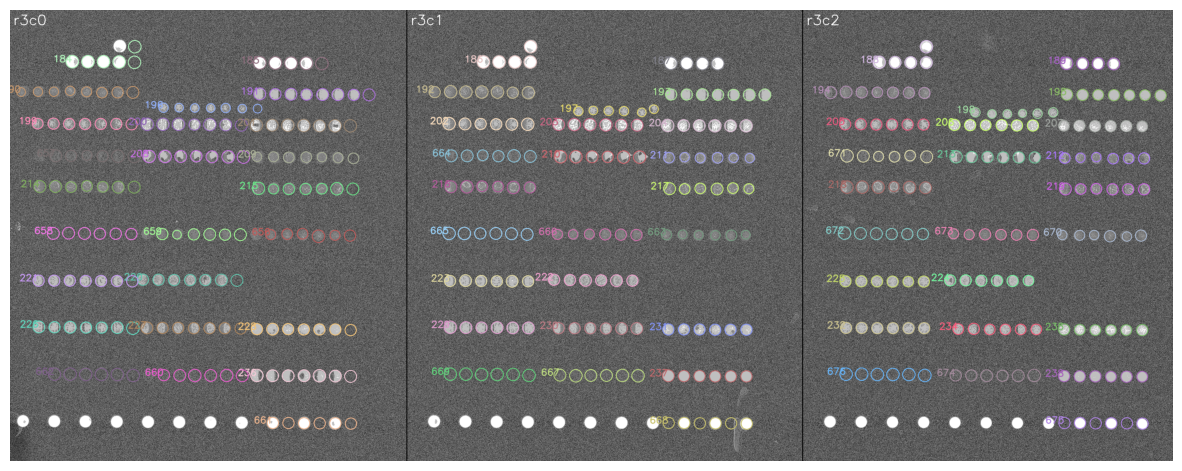

In [20]:
# row 3
r = 3
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, do_plot=1)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[-50,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            197:['move spot-1 6 u,5 l'],
            441:['move all 3 l']
        }
    )


['r4c0', 'r4c1', 'r4c2']

 

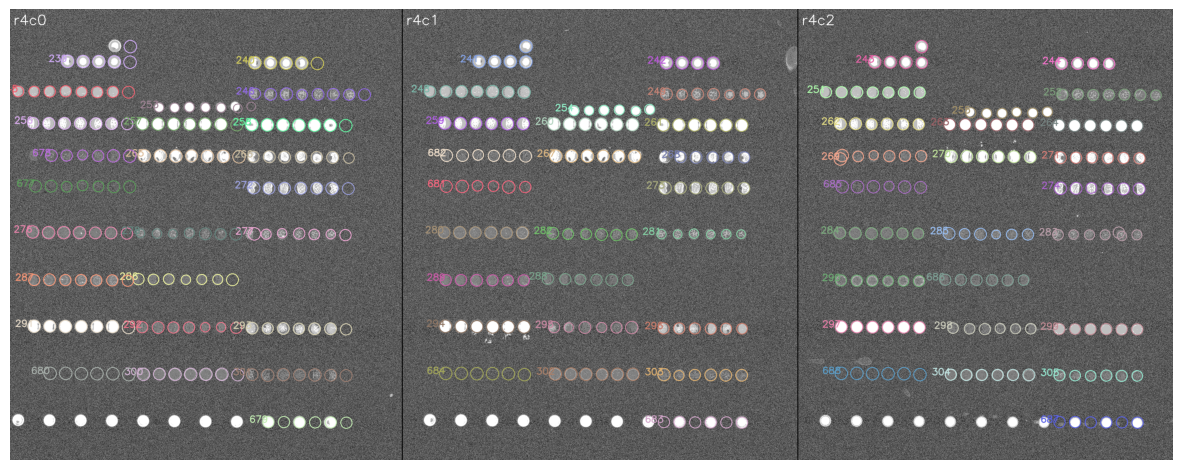

In [21]:
# row 4
r = 4
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[-40,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            247:['del',],277:['del spot0',],
            253:['move spot-1 6 l, 6 u'], 458:['move all 2 l'], 282:['change_r spot1 r+3','change_r spot-2 r-1','move spot-2 2 u, 2 l'],255:['move spot0 3 d, 3 r'],268:['del spot0']

        })


['r5c0', 'r5c1', 'r5c2']

 

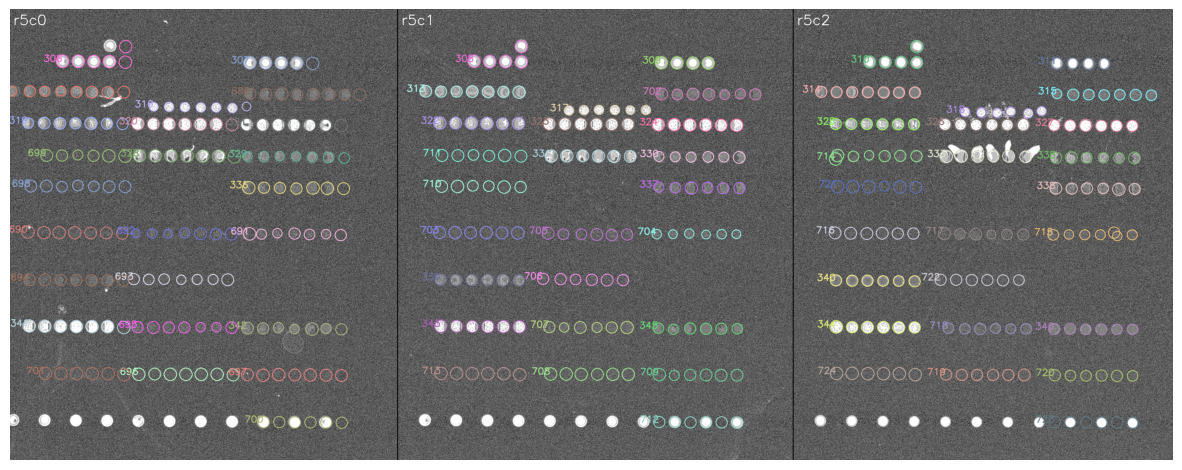

In [22]:
# row 5
r = 5
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[-90,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
        })


['r6c0', 'r6c1', 'r6c2']

 

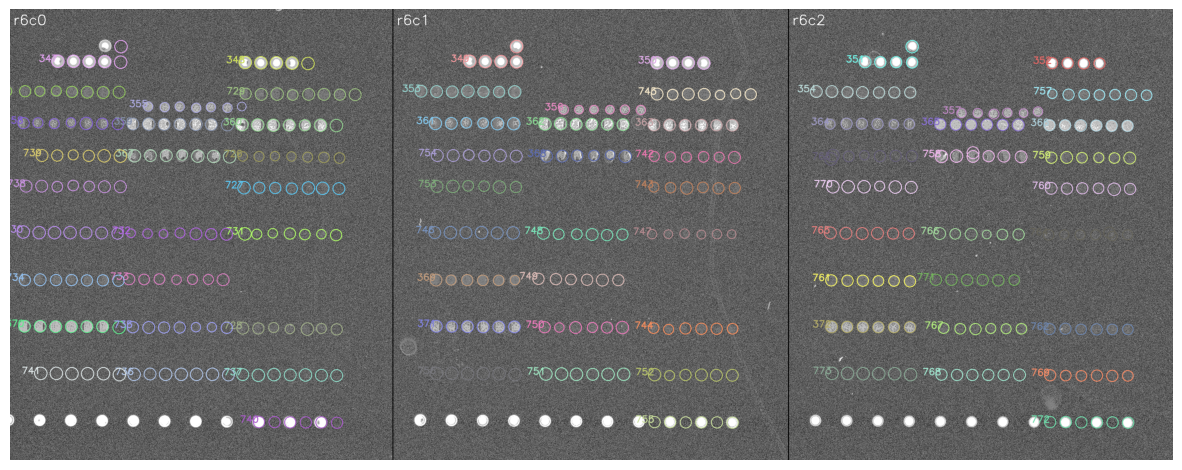

In [23]:
# row 6
r = 6
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[-100,0],f'r{r}c1':[0,0],f'r{r}c2':[0,0],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            542:['del spot0'], 357:['move spot0 3 d, 3 r','move spot2 3 r, 3 d']
        })


['r7c0', 'r7c1', 'r7c2']
blockr7c2 has 26 clusters which is wrong!
->[377, 378, 383, 384, 388, 389, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832]

 

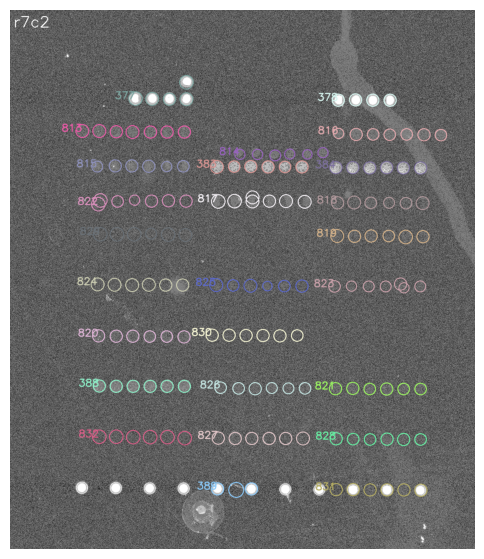

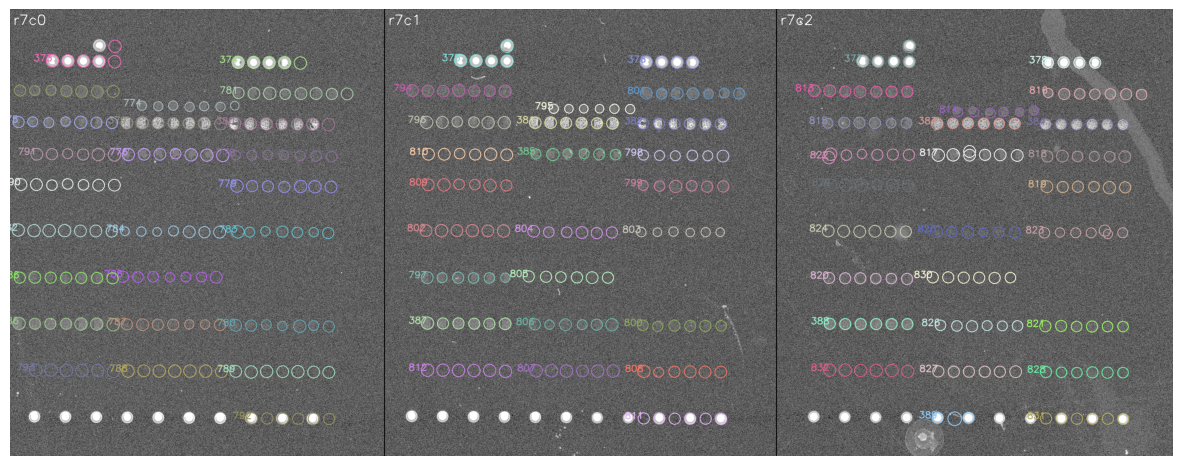

In [25]:
##### row 7
r = 7
current_list = rows_names_list[r]
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0':[-100,0],f'r{r}c1':[0,5],f'r{r}c2':[-5,5],f'r{r}c3':[0,0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            # 389:['del spot5']
        })


In [ ]:
##### row 8
r = 8
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []

print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-50, 0], f'r{r}c1': [-50, 0], f'r{r}c2': [-50, 0], f'r{r}c3': [-50, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            386:['del'], 393:['del'], 402:['del'], 394:['del spot0'], 388:['move spot-1 10 r, 6 u']
        })


In [ ]:
##### row 9
r = 9
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0': [0, 0], f'r{r}c1': [0, 0], f'r{r}c2': [-2, 45], f'r{r}c3': [0, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
             403:['del'],
            # 404:['del spot6,4,2','move all 50 u'],
            404:['del'],
            420:['del'],
            405:['del'],
            # 409:['del'],
            # 411:['del spot0'],
            417:['del'],
        })


In [ ]:
##### row 10
r = 10
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-100, 0], f'r{r}c1': [-70, 0], f'r{r}c2': [-50, 0], f'r{r}c3': [-50, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
        })

In [ ]:
##### row 11
r = 11
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        move_whole_block_match={f'r{r}c0': [0, 0], f'r{r}c1': [0, 0], f'r{r}c2': [0, 0], f'r{r}c3': [0, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
        })

In [ ]:
# b11 = scan_data.get_block('r11c0')
# # b11.reset_block_start_end_coords((200,9900), [1200,11000], debug=False)
# # b11.add_cropped_images()
# b11.plot_block()
# b11.__dict__

In [ ]:
##### row 12
r = 12
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-0, 0], f'r{r}c1': [-100, 0], f'r{r}c2': [-50, 0], f'r{r}c3': [-50, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            # 759:['del'],755:['add 1 cluster below d=50'], 761:['add 1 cluster above d=50'],
            555:['del']
        })


In [ ]:
##### row 13
r = 13
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-0, 0], f'r{r}c1': [-100, 0], f'r{r}c2': [-50, 0], f'r{r}c3': [-50, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            569:['del'], 567:['del spot3,2,1,0'], 581:['move spot-1 10 l']
        })


In [ ]:
##### row 14
r = 14
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-0, 0], f'r{r}c1': [-100, 0], f'r{r}c2': [-50, 0], f'r{r}c3': [-50, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            615:['del spot11,9,7,5,3,1,0']
        })


In [ ]:
##### row 15
r = 15
if scan_data.assay == 'SD4':
    current_list = rows_names_list[r]
else:
    current_list = []
print(current_list)

# start_over = True

if not start_over:
    # ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    ClassesFunctions.do_final_results_plot(file_name=input_file_name, block_ids_list=current_list, fig_size=fig_size, do_plot=plot_figures)

else:
    ClassesFunctions.edit_multiple_blocks(
        current_list, file_name=input_file_name, init_template_id=test_ind, correct_N=N,
        debug=0, debug_blocks=[''], debug_clusters=[], fig_size=fig_size,
        # move_whole_block_match={f'r{r}c0': [-50, -100], f'r{r}c1': [0, -10], f'r{r}c2': [0, 0], f'r{r}c3': [0, 0]},
        # redo_circle_finding_for_blocks_or_clusters=['r0c3'],
        preprocess_params=scan_data.preprocess_params, plot_before_after=0,
        manual_spot_edit_dict={
            # 780:['del spot11,9,7,5,3,1,0']
        })


In [ ]:
path, input_file_name

In [ ]:
ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)


In [ ]:
# massive Ab screening - OF
scan_data = ScanDataObj.get_scan_data(file_name=input_file_name)

scan_data.cAb_names = ['antiCy5_l','antiCy5_r','71-','33+','35+','29--','59fw','59+','36+','25-','71-','66-','31+',
                       '56+58','55fw','55+','27-','64-','73-','34+','41+','30-','57-+','56-+','7+','antiCy5_b'] # row by row, left to right

Ag_start = 250
DF = 10
n_points = 4
last_row_blank = False

dAb_labels = ['dAb35','dAb36']
targets = ['Beta','Beta']
for r in range(8):
    row_label = row_labels[r]
    for c in range(3):
        block_id = f'r{r}c{c}'
        block = scan_data.get_block(block_id)
        if r < 4:
            block.dAb_label = dAb_labels[0]
            block.target = targets[0]
            block.Ag_conc = Ag_start/(DF**r)
        else:
            block.dAb_label = dAb_labels[1]
            block.target = targets[1]
            block.Ag_conc = Ag_start/(DF**(r-4))
        block.add_names_to_clusters(debug=0)
        print(f'{block.block_id} - {block.target}@{block.Ag_conc} - {block.dAb_label}')



In [ ]:
# EXPERIMENT #1: Screening with secondary antibodies
# row_labels = ['CovAb1','CovAb31','CovAb11','CovAb56','CovAb58','CovAb69','CovAb70','Blank',]
# for r in range(8):
#     row_label = row_labels[r]
#     for c in range(3):
#         block_id = f'r{r}c{c}'
#         block = scan_data.get_block(block_id)
#         block.dAb_label = row_label
#         block.target = 'N/A'
#         block.Ag_conc = 500
#         block.add_names_to_clusters(debug=0)
#         print(f'{block.block_id} - {block.target}@{block.Ag_conc} - {block.dAb_label}')
# custom_naming = {
#     'r0c0': 25, 'r0c1': 27, 'r0c2': 26,
#     'r1c0': 26, 'r1c1': 'B', 'r1c2': 28,
#     'r2c0': 27, 'r2c1': 25, 'r2c2': 30,
#     'r3c0': 'B', 'r3c1': 29, 'r3c2': 36,
#     'r4c0': 28, 'r4c1': 36, 'r4c2': 25,
#     'r5c0': 30, 'r5c1': 26, 'r5c2': 29,
#     'r6c0': 36, 'r6c1': 30, 'r6c2': 'B',
#     'r7c0': 29, 'r7c1': 28, 'r7c2': 27,
# }
#
# for block_id, name in custom_naming.items():
#     block = scan_data.get_block(block_id)
#     if name == 'B':
#         block.dAb_label = f'Blank'
#         continue
#     block.dAb_label = f'CovAb{name}'

In [ ]:
scan_data.get_block('r4c0').plot_block(description='full_report')


In [ ]:
# ClassesFunctions.save_dicts_in_pickle(path=path)

In [ ]:
# scan_data.get_block('r0c0').full_report()
# print(scan_data.get_block('r0c0').full_report(return_str=1))
# scan_data.get_block('r1c0').plot_block(description='cAb_names')

In [ ]:
out_dfs = []
sigma1 = 2
sigma2 = 1.7

# this one goes row by row:
for r in range(scan_data.block_nrow):
    block_ids_list = rows_names_list[r]
    out_df, counts = ClassesFunctions.measure_signal_of_blocks(
        block_ids_list=block_ids_list,
        file_name=input_file_name,
        sigma1=sigma1,
        sigma2=sigma2,
        fg_inc_pixels=1,
        margin_pixels=3,
        bg_r=6,
        debug=0,
        debug_blocks_ids=[''],
        plot_images=0,
    )
    out_dfs.append(out_df)
#     total_counts += counts1



In [ ]:
out_df, counts = ClassesFunctions.measure_signal_of_blocks(
        block_ids_list=['r7c0'],
        file_name=input_file_name,
        sigma1=sigma1,
        sigma2=sigma2,
        fg_inc_pixels=1,
        margin_pixels=3,
        bg_r=6,
        debug=1,
        debug_blocks_ids=[''],
        plot_images=0,
    )

In [ ]:
# path

In [ ]:
# wanna see everything for clusterZ in rXcY:
cAb = '71-'
row_id = 7
block_id = f'r{row_id}c0'
df1 = out_dfs[row_id]
df = df1[(df1['cAb_name']==cAb) & (df1['Block_ID']==block_id)]
scan_data.get_block(block_id).plot_block(description='full_report', crop_to_mask=1)
# print(df)
df1

In [ ]:
# formated_path

In [ ]:
dosave=True
formated_path = f'{path}/{input_file_name}_genepix_level'

if dosave:
    ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
    intensities_df = pd.concat(out_dfs, ignore_index=True)
    with open(formated_path+'.pickle', 'wb') as file:
        pickle.dump(intensities_df, file)

    intensities_writer = pd.ExcelWriter(formated_path + '.xlsx')
    intensities_df.to_excel(intensities_writer, index=True)
    intensities_writer.close()


    print(f'saved intensities_df {intensities_df.shape}.')

else:
    with open(formated_path+'.pickle', 'rb') as file:
        intensities_df = pickle.load(file)
        print(f'loaded intensities_df {intensities_df.shape}')


intensities_df

In [ ]:
intensities_df[intensities_df['cAb_name']=='JN']

In [ ]:
scan_data.get_block('r0c0').plot_block(description='full_report', fig_size=[4,4])


In [ ]:
# ag_test = 1
# grouped = intensities_df.groupby(['Block_ID', 'Row', 'Col', 'cAb_name', 'dAb_name'])['Average_F_B_PostProcess'].mean().reset_index()
# grouped = grouped.sort_values(by=['Row', 'Col'])
# grouped['abs_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}" +
#                                            ("" if x['Col'] == 0 else "_1" if x['Col'] == 1 else "_2"), axis=1)
#
# grouped[['COV_Ab', 'SEC_Ab']] = grouped['dAb_name'].str.extract(r'([^_]+)_([^_]+)')
#
# grouped[grouped['cAb_name']=='JN']
# # grouped.columns
#


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# ags = sorted(grouped['cAb_name'].unique())
# n_rows, n_cols = 3, 5
#
# fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3, n_rows * 3), constrained_layout=True)
#
# for ax, ag_val in zip(axes.flat, ags):
#     subset = grouped[grouped['cAb_name'] == ag_val]
#     pivot = subset.groupby(['COV_Ab', 'SEC_Ab'])['Average_F_B_PostProcess'].mean().unstack()/1000
#
#     sns.heatmap(pivot, annot=True, cmap='crest',ax=ax, cbar=False)
#     ax.set_title(f'Ag: {ag_val}')
#     ax.set_xlabel('SEC_Ab')
#     ax.set_ylabel('COV_Ab')
#
# # Hide unused subplots if there are any
# for ax in axes.flat[len(ags):]:
#     ax.axis('off')
#
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
#
# pivot = grouped.groupby(['COV_Ab', 'SEC_Ab'])['Average_F_B_PostProcess'].mean().unstack()/1000
#
# plt.figure(figsize=(3,4))
# sns.heatmap(pivot, annot=True, cmap="viridis")
# plt.title(f'Avg Heatmap')
# plt.xlabel('SEC_Ab')
# plt.ylabel('COV_Ab')
# plt.tight_layout()
# plt.show()
#


In [ ]:
intensities_df.head()

In [ ]:
grouped = intensities_df.groupby(['Ag_Conc.', 'Block_ID', 'Row', 'Col', 'target', 'cAb_name', 'dAb_name'])['Average_F_B_PostProcess'].mean().reset_index()
grouped = grouped.sort_values(by=['Row', 'Col'])

grouped['dAb_cAb_rep'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}" + ("" if x['Col'] == 0 else f"_{x['Col']}"), axis=1)
# if ag_test:
#     grouped['ab_pair'] = grouped.apply(lambda x: f"{x['dAb_name']}_{x['cAb_name']}" +
#                                            ("" if x['Row'] % 2 == 0 else "_2"), axis=1)


grouped[grouped['cAb_name']=='71-']



In [ ]:
# sheets_df = {}
# for Ag, group in grouped.groupby('cAb_name'):
#     print(Ag)
#     sheet_name = f"{Ag}"
#     filtered_group = group.copy()
#     # print(filtered_group.columns)
#     unique_reps = sorted(filtered_group['abs_rep'].unique())
#     # print(f'unique_reps: {unique_reps}')
#     filtered_group = filtered_group[filtered_group['abs_rep'].isin(unique_reps)]
#     filtered_group.ainsert(0, 'Label', sheet_name)
#     pivot_df = filtered_group.pivot_table(index=['Label'], columns=['abs_rep'],
#                                  values='Average_F_B_PostProcess').sort_values(by=['Label'],ascending=False)
#     pivot_df.reset_index(inplace=True)
#     sheets_df[sheet_name] = pivot_df
#
# sheets_df['71-']

In [ ]:
# grouped.groupby(['dAb_name', 'target']).head()

In [ ]:
sheets_df = {}
for (dAb, target), group in grouped.groupby(['dAb_name','target']):
    sheet_name = f"{dAb}_{target}"
    filtered_group = group.copy()
    print(filtered_group.columns)
    unique_reps = sorted(filtered_group['dAb_cAb_rep'].unique())
    filtered_group = filtered_group[filtered_group['dAb_cAb_rep'].isin(unique_reps)]
    filtered_group.insert(0, 'Label', sheet_name)
    pivot_df = filtered_group.pivot_table(index=['Label','Ag_Conc.'], columns=['dAb_cAb_rep'],
                                 values='Average_F_B_PostProcess').sort_values(by=['Label','Ag_Conc.'],ascending=False)
    pivot_df.reset_index(inplace=True)
    sheets_df[sheet_name] = pivot_df

# sheets_df['34@1.5_WT']

In [ ]:
sheets_df['dAb36_Beta']

In [ ]:
# ClassesFunctions.save_current_data_obj(file_name=input_file_name, path=path)
#
# formated_path = f'{path}/{input_file_name}_summary'
# summary_writer = pd.ExcelWriter(formated_path + '.xlsx')
#
# for sheet_name, sheet_df in sheets_df.items():
#     sheet_df.to_excel(summary_writer, sheet_name=sheet_name, index=False)
# summary_writer.close()
#
# with open(formated_path+'.pickle', 'wb') as file:
#     pickle.dump(sheets_df, file)


In [ ]:

filtered_group = grouped.copy()
# print(filtered_group.columns)
unique_reps = sorted(filtered_group['abs_rep'].unique())
# print(f'unique_reps: {unique_reps}')
filtered_group = filtered_group[filtered_group['abs_rep'].isin(unique_reps)]
# filtered_group.insert(0, 'Ag', )
pivot_df = filtered_group.pivot_table(index=['cAb_name'], columns=['abs_rep'],
                             values='Average_F_B_PostProcess').sort_values(by=['cAb_name'],ascending=False)
pivot_df

In [ ]:
formated_path = f'{path}/{input_file_name}_summary'
summary_writer = pd.ExcelWriter(formated_path + '.xlsx')
pivot_df.to_excel(summary_writer, index=True)
summary_writer.close()

with open(formated_path+'.pickle', 'wb') as file:
    pickle.dump(pivot_df, file)


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd
#
# def plot_dose_response_with_error(results_df):
#     # Extract base names by removing "_2" suffix if present
#     results_df['base_dAb_cAb_rep'] = results_df['dAb_cAb_rep'].str.replace('_2$', '', regex=True)
#
#     # Group by target, Ag_Conc., and base_dAb_cAb_rep to compute mean and std
#     grouped_df = results_df.groupby(['target', 'Ag_Conc.', 'base_dAb_cAb_rep'])['Average_F_B_PostProcess'].agg(['mean', 'std']).reset_index()
#
#     # Plot each unique target
#     plt.figure(figsize=(8, 6))
#     sns.lineplot(data=grouped_df, x='Ag_Conc.', y='mean', hue='base_dAb_cAb_rep', style='target', marker='o')
#     plt.errorbar(grouped_df['Ag_Conc.'], grouped_df['mean'], yerr=grouped_df['std'], fmt='o', alpha=0.5)
#
#     plt.xscale('log')  # Log scale if needed
#     plt.xlabel("Antigen Concentration")
#     plt.ylabel("Response (Fluorescence)")
#     plt.title("Dose-Response Curves with Error Bars")
#     plt.legend(title="dAb_cAb_rep")
#     plt.show()
#
# # Example usage:
# plot_dose_response_with_error(group)
